In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [72]:
sns.set_style("whitegrid")

In [78]:
# to get minutes
zerg = pd.read_csv("processed/zerg_firsts_100k.csv", index_col=0) / (16 * 60)
terran = pd.read_csv("processed/terran_firsts_100k.csv", index_col=0) / (16 * 60)
protoss = pd.read_csv("processed/protoss_firsts_100k.csv", index_col=0) / (16 * 60)

In [73]:
zergs.head()

,overlord,drone,queen,zergling,roach,sporecrawler,overseer,broodling,spinecrawler,baneling,...,ravager,mutalisk,corruptor,ultralisk,infestor,lurker,broodlord,viper,nydusworm,swarmhost
0,0,0,3.748958,3.210417,NaN,6.645833,9.888542,10.382292,NaN,6.301042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,3.910417,5.483333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.592708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,3.622917,3.752083,NaN,6.866667,12.494792,NaN,NaN,NaN,...,NaN,NaN,11.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,3.087500,5.600000,NaN,8.484375,9.164583,8.105208,5.706250,NaN,...,NaN,14.046875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,4.257292,3.239583,8.84375,8.373958,8.097917,NaN,6.677083,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


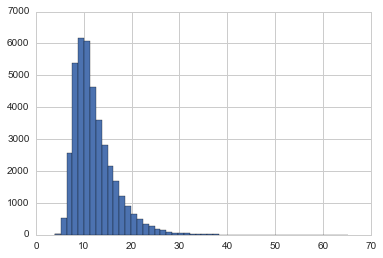

In [79]:
zerg.overseer.hist(bins=50)

In [84]:
zerg.head()

,overlord,drone,queen,zergling,roach,sporecrawler,overseer,broodling,spinecrawler,baneling,...,ravager,mutalisk,corruptor,ultralisk,infestor,lurker,broodlord,viper,nydusworm,swarmhost
0,0,0,3.748958,3.210417,NaN,6.645833,9.888542,10.382292,NaN,6.301042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,3.910417,5.483333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.592708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,3.622917,3.752083,NaN,6.866667,12.494792,NaN,NaN,NaN,...,NaN,NaN,11.275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,3.087500,5.600000,NaN,8.484375,9.164583,8.105208,5.706250,NaN,...,NaN,14.046875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,4.257292,3.239583,8.84375,8.373958,8.097917,NaN,6.677083,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
def generate_cumulative_df(race_df, max_minute=30, step=0.5):
    res = []
    for unit in race_df.columns: 
        counts, bins = np.histogram(race_df[unit].dropna(), bins=np.arange(0, max_minute, step))
        res.append(pd.Series(np.cumsum(counts), index=bins[:-1], name=unit))
    return 100 * pd.concat(res, axis=1) / len(race_df)

In [89]:
zerg_by_time = generate_cumulative_df(zerg)
terran_by_time = generate_cumulative_df(terran)
protoss_by_time = generate_cumulative_df(protoss)

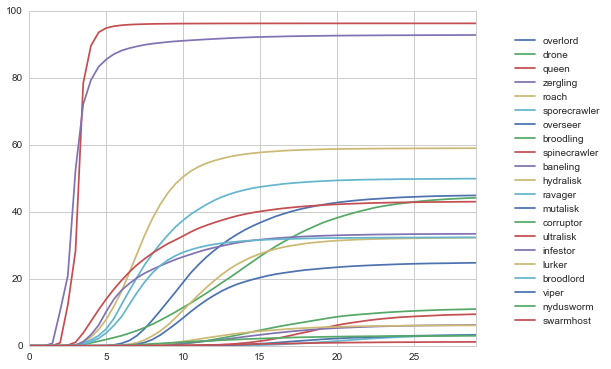

In [87]:
zerg_by_time.plot(figsize=(8, 6)) \
  .legend(bbox_to_anchor=(1.3, 0.95))

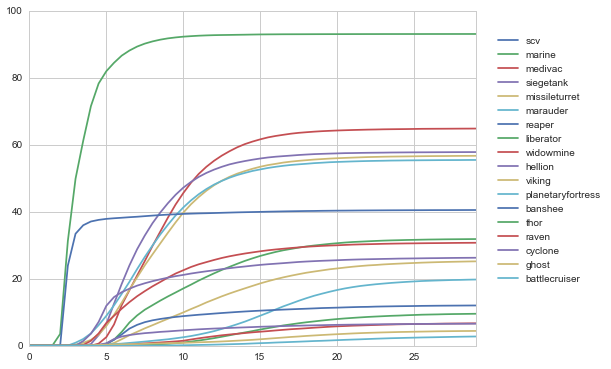

In [93]:
terran_by_time.plot(figsize=(8, 6)) \
  .legend(bbox_to_anchor=(1.3, 0.95))

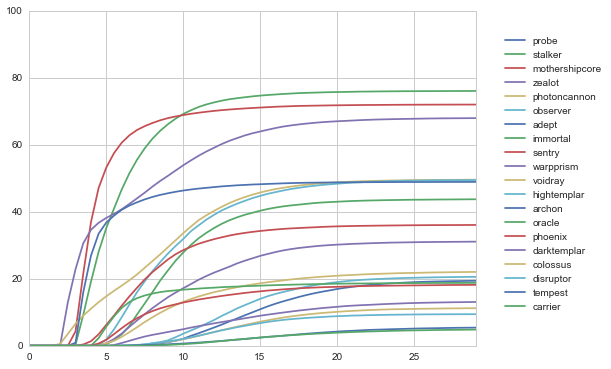

In [91]:
protoss_by_time.plot(figsize=(8, 6)) \
  .legend(bbox_to_anchor=(1.3, 0.95))

In [94]:
# normalize by game length?